## Assignment 2: Text Clustering
### By: Group 11

### Step 1: Dataset Creation and preprocessing of Data

##### For our dataset we have chosen seven books from the genre crime fiction/murder mystery
##### The names of selected books are: 
- Murder in the Gunroom
- The Crime Club
- The Devil Doctor
- The House of Arrow
- The Mystery of Blue Train
- The Wrong Letter
- Time Crime

In [1]:
#importing libraries
import os
import re
import random
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [2]:
# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/kish/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kish/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/kish/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
'''The following fuction will take text from books and remove the word capitalization,
unwanted characters, white spaces, and stop words.'''
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove unwanted characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove white spaces
    text = text.strip()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Join words back into text
    preprocessed_text = ' '.join(words)
    
    return preprocessed_text

In [4]:
# Function to apply lemmatization and tokenization
def lemmatize_and_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

In [5]:
'''The following function will take the preprocessed data 
and create 200 documents with 150 words each'''
def create_samples(text, num_samples=200, words_per_sample=150):
    samples = []
    words = text.split()
    
    # Calculate maximum number of samples that can be created
    max_samples = len(words) // words_per_sample
    
    if max_samples < num_samples:
        print(f"Not enough words to create {num_samples} samples. Creating {max_samples} samples instead.")
        num_samples = max_samples
    
    # Create samples
    for i in range(num_samples):
        start_index = random.randint(0, len(words) - words_per_sample)
        sample = ' '.join(words[start_index:start_index + words_per_sample])
        samples.append(sample)
    
    return samples

In [6]:
# Function to process books
def process_books(book_paths):
    df_data = []
    
    for book_path in book_paths:

        book_name = os.path.basename(book_path)
        # Preprocess the book
        with open(book_path, 'r', encoding='utf-8') as f:
            text = f.read()
            preprocessed_text = preprocess_text(text)
        
        # remove the word capitalization, unwanted characters, white spaces, and stop words and 
        # save preprocessed book as book_name_data.txt
        preprocessed_file = os.path.splitext(book_path)[0] + "_data.txt"
        with open(preprocessed_file, 'w', encoding='utf-8') as f:
            f.write(preprocessed_text)
        
        # Apply lemmatization and tokenization 
        lemmatized_text = lemmatize_and_tokenize(preprocessed_text)
        
        # Save the books after lemmatization is done as book_name_lemmatized.txt
        lemmatized_file = os.path.splitext(book_path)[0] + "_lemmatized.txt"
        with open(lemmatized_file, 'w', encoding='utf-8') as f:
            f.write(lemmatized_text)
        
        # Create samples for each book using create_samples function
        print(book_name)
        samples = create_samples(lemmatized_text)
        
        # Add samples to DataFrame
        for sample in samples:
            df_data.append((sample, book_name))

    
    # Create DataFrame
    df = pd.DataFrame(df_data, columns=['Sample', 'Book_Name'])
    
    return df

#### After creating 200 samples from all the books, they are stored in a csv file called 'book_samples.csv'. This file contains the clean, tokenized and lemmatized text. The csv file is created with labels. The labels are books names. 

In [7]:

# Paths to input TXT files for seven books for preprocessing
book_paths = [
    "Dataset/Murder in the Gunroom.txt",
    "Dataset/The Crime Club.txt",
    "Dataset/The Devil Doctor.txt",
    "Dataset/The House of Arrow.txt",
    "Dataset/The Wrong Letter.txt",
    "Dataset/The mystery of blue train.txt",
    "Dataset/Time Crime.txt"
]
    
# Process books
df = process_books(book_paths)
    
# Display DataFrame
print(df)
print(df['Book_Name'].unique())
print("----")
    
# Save DataFrame to CSV file
df.to_csv('book_samples.csv', index=False)

Murder in the Gunroom.txt
The Crime Club.txt
The Devil Doctor.txt
The House of Arrow.txt
The Wrong Letter.txt
Not enough words to create 200 samples. Creating 127 samples instead.
The mystery of blue train.txt
Time Crime.txt
Not enough words to create 200 samples. Creating 127 samples instead.
                                                 Sample  \
0     hundred thousand himits wonder somebody hasnt ...   
1     weapon caution would excessive mill grenade wa...   
2     pistol layer old newspaper picked one mckenna ...   
3     either coroner police called mr goode family s...   
4     know pretty much whats collection gresham said...   
...                                                 ...   
1249  masterpiece ive met time elbraz vark political...   
1250  kharanda slave couple paratime police officer ...   
1251  vall wasnt listening frowned puzzlement thats ...   
1252  cattle increasing magnification looked group b...   
1253  didnt want refuse trying make know confounded ... 

#### Once we have the final csv file - 'book_samples.csv',  we then shuffle the data, and encode it by removing name of the books and replacing it number labels. The output file is saved as 'encoded_books_data.csv'

In [8]:
# Read data from CSV file
data = pd.read_csv('book_samples.csv')

# Shuffle the data
data_shuffled = shuffle(data,random_state=42)

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y_actual= label_encoder.fit_transform(data_shuffled['Book_Name'])
data_shuffled['Book_Name']=y_actual

# Write the processed data to a new CSV file
data_shuffled.to_csv('encoded_books_data.csv', index=False)

print("Data processing completed and saved to processed_data.csv")

Data processing completed and saved to processed_data.csv


### Step 2: Word Embediing and Visualization (Feature Engineering)

#### Word Embedding

##### Word Embeddings in NLP is a technique where individual words are represented as real-valued vectors in a lower-dimensional space and captures inter-word semantics. Each word is represented by a real-valued vector with tens or hundreds of dimensions.

##### The word Embedding techniques used are:
- Bag of Words (BOW)
- TF-IDF 
- Doc2vec
- LDA

In [14]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim
import pickle

##### BOW and TF-IDF

##### BOW: A bag of words is one of the popular word embedding techniques of text where each value in the vector would represent the count of words in a document/sentence. In other words, it extracts features from the text. We also refer to it as vectorization.

##### TF-IDF: Term frequency-inverse document frequency is the machine learning algorithm that is used for word embedding for text. It comprises two metrics, namely term frequency (TF) and inverse document frequency (IDF).

##### This algorithm works on a statistical measure of finding word relevance in the text that can be in the form of a single document or various documents that are referred to as corpus.

##### The term frequency (TF) score measures the frequency of words in a particular document. In simple words, it means that the occurrence of words is counted in the documents.

In [10]:
# Load the processed data
data_frame = pd.read_csv('encoded_books_data.csv')

# Bag of Words (BoW) - CountVectorizer
BOW = CountVectorizer()
BOW_transformation = BOW.fit_transform(data_frame['Sample'])

# TF-IDF
def tfidf_ngram(n_gram,X_train=data_frame['Sample']):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec

# Applying tfidf with 1-gram, and 2-gram
tfidf_1g_transformation= tfidf_ngram(1,X_train=data_frame['Sample'])
tfidf_2g_transformation= tfidf_ngram(2,X_train=data_frame['Sample'])


##### Doc2Vec

##### Doc2Vec is a neural network-based approach that learns the distributed representation of documents. It is an unsupervised learning technique that maps each document to a fixed-length vector in a high-dimensional space. 

##### The vectors are learned in such a way that similar documents are mapped to nearby points in the vector space. This enables us to compare documents based on their vector representation and perform tasks such as document classification, clustering, and similarity analysis..

In [11]:
# Doc2Vec
# Tokenization of each document
tokenized_doc = []
for d in data_frame['Sample']:
    tokenized_doc.append(word_tokenize(d.lower()))

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]
# Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in data_frame['Sample']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
doc2vec_vectors=get_doc2vec_vector(data_frame['Sample'])
len(doc2vec_vectors)

1254

##### LDA

##### Latent Dirichlet Allocation (LDA) is a popular form of statistical topic modeling. In LDA, documents are represented as a mixture of topics and a topic is a bunch of words. Those topics reside within a hidden, also known as a latent layer.

In [12]:
#LDA
paragraphs = data_frame["Sample"].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Set training parameters.
num_topics = 7
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

from gensim.models.coherencemodel import CoherenceModel
## Evaluating coherence of gensim LDA model
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence_score = cm.get_coherence()
print(coherence_score)

1254
83
Number of unique tokens: 1517
Number of documents: 1254
Average topic coherence: -1.6485.
-1.6484947978811142


##### Saving the results from all transformations in a dictionary

In [15]:
# Save the results
text_embedding={
    'BOW':BOW_transformation.toarray(),
    'TF_IDF 1_gram':tfidf_1g_transformation.toarray(),
    'Doc2vec':np.array(doc2vec_vectors),
    'LDA':lda_to_cluster,
}

#### Word Embedding Visualization

In [16]:
# %pip install gdown
# %gdown --id 1ajm_Az1wn16aI9b8kD1ao3efRiB1KJCz
# %gdown --id 1XBbRmnhaI17OLh2FqhUdQdn2rq2KJJIq

In [17]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()

for key in embedding.keys():
  embedding[key]=pca.fit_transform(embedding[key])
  df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
  fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
  fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
  fig.show()

### Step 3: Clustering

#### Clustering is the task of dividing the unlabeled data or data points into different clusters such that similar data points fall in the same cluster than those which differ from the others. In simple words, the aim of the clustering process is to segregate groups with similar traits and assign them into clusters.

#### The Clustering Algorithms used are as follows:
- K-Means
- Expectation Maximization (EM)
- Hierarchical Clustering

#### 1. K-Means Clustering

#### K-means clustering is a widely used method for cluster analysis where the aim is to partition a set of objects into K clusters in such a way that the sum of the squared distances between the objects and their assigned cluster mean is minimized.

In [18]:
#importing libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
import seaborn as sns
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

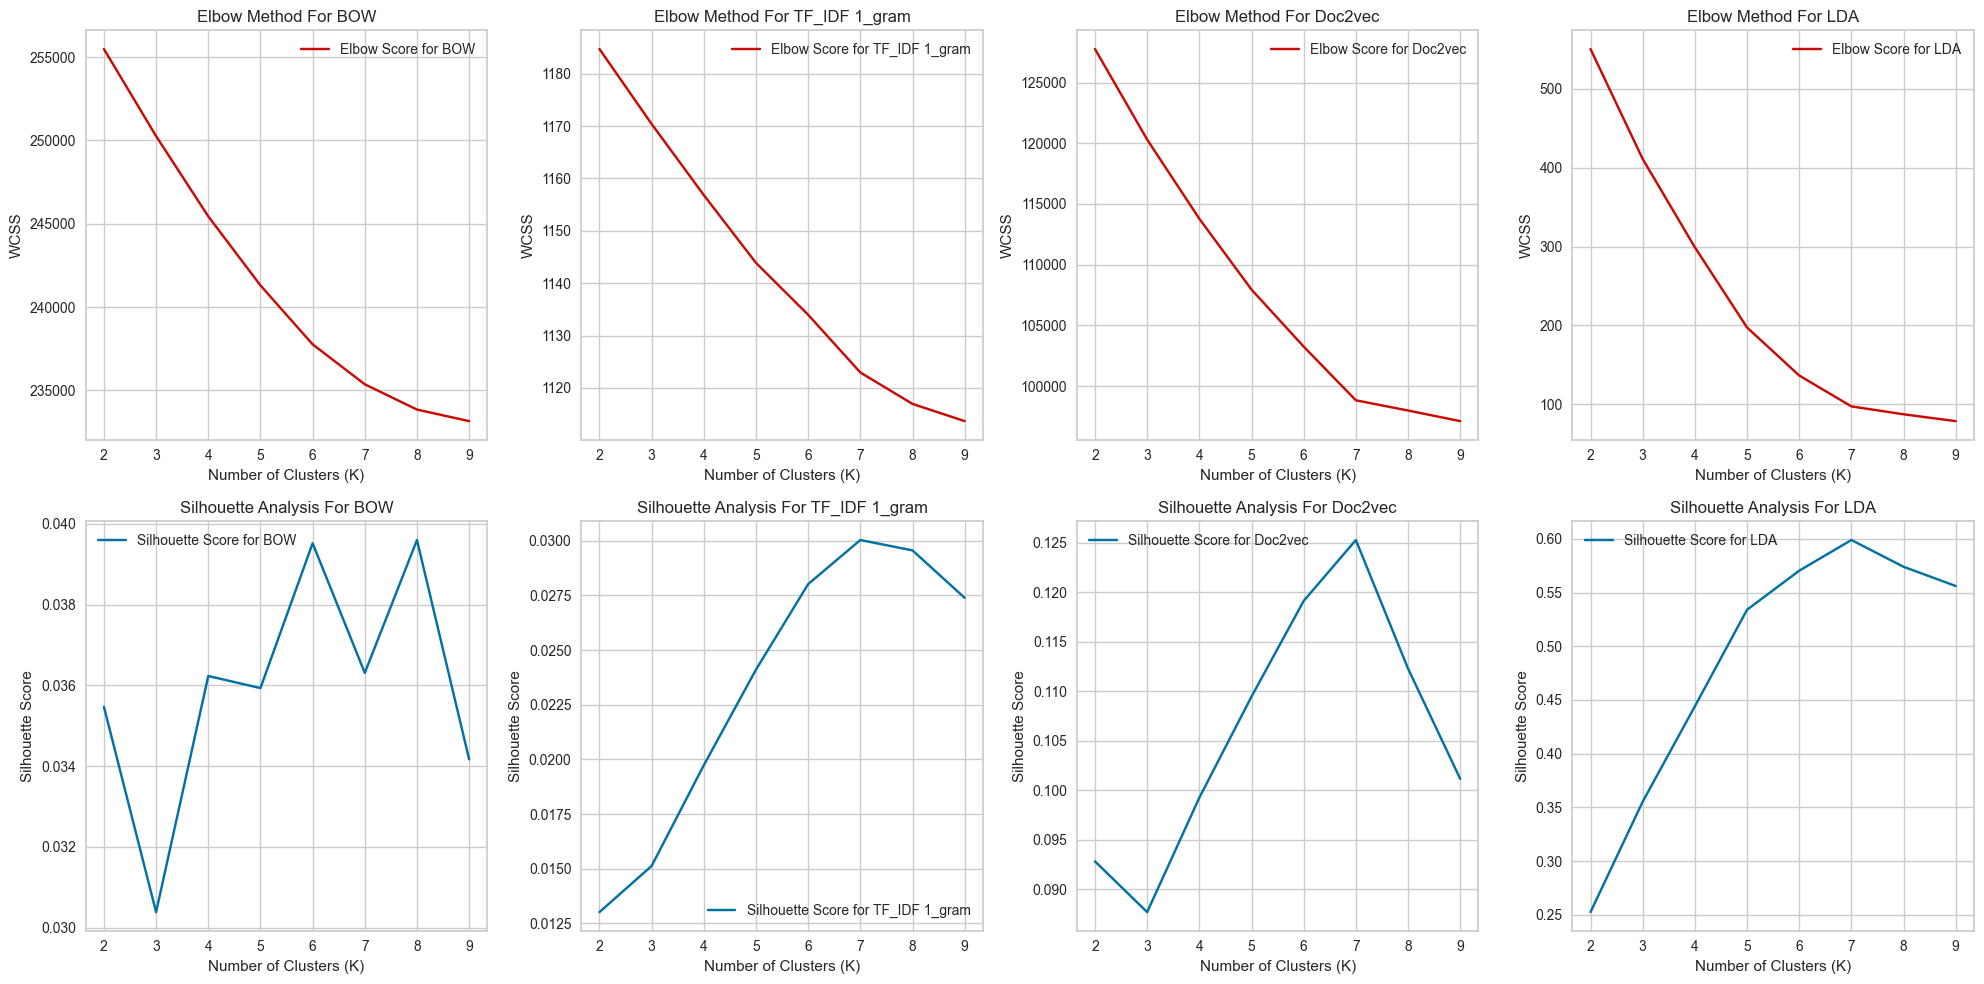

In [19]:
'''This code loops over data in text_embedding and calculates elbow score and 
silhouette score for clusters in range 2 to 10. This data is then plotted in a line graph.'''
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize dictionaries to store elbow and silhouette scores
kmeans_elb_vec = {}
kmeans_sil_vec = {}
optimal_clusters = {}
clusters = 10

# Create a figure with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for idx, (k, x_kmeans) in enumerate(text_embedding.items()):
    silhouette_scores = []
    elbow_scores = []
    silhouette_score_val = np.zeros((clusters-2))
    optimal_silhouette_score = -1  # Initialize the optimal silhouette score
    optimal_k_value = -1  # Initialize the corresponding K value

    # Calculate silhouette score and elbow score for different number of clusters
    for i in range(2, clusters):
        kmeans_classifier = KMeans(n_clusters=i,
                                   init='k-means++',
                                   n_init=10,
                                   max_iter=500,
                                   random_state=42,
                                   algorithm='elkan')
        label_kmeans = kmeans_classifier.fit_predict(x_kmeans)
        silhouette_score_val = silhouette_score(x_kmeans, label_kmeans)
        if silhouette_score_val > optimal_silhouette_score:
            optimal_silhouette_score = silhouette_score_val
            optimal_k_value = i

        silhouette_scores.append(silhouette_score_val)
        elbow_scores.append(kmeans_classifier.inertia_)

    optimal_clusters[k] = (optimal_silhouette_score, optimal_k_value)

    # Store silhouette and elbow scores in the respective dictionaries
    kmeans_elb_vec[k] = elbow_scores
    kmeans_sil_vec[k] = silhouette_scores

    # Plot elbow score against the number of clusters on axes[0, idx]
    axes[0, idx].plot(range(2, clusters), elbow_scores, 'rx-', label='Elbow Score for {}'.format(k))
    axes[0, idx].set_xlabel('Number of Clusters (K)')
    axes[0, idx].set_ylabel('WCSS')
    axes[0, idx].set_title('Elbow Method For {}'.format(k))
    axes[0, idx].legend()
    axes[0, idx].grid(True)

    # Plot silhouette score against the number of clusters on axes[1, idx]
    axes[1, idx].plot(range(2, clusters), silhouette_scores, 'bx-', label='Silhouette Score for {}'.format(k))
    axes[1, idx].set_xlabel('Number of Clusters (K)')
    axes[1, idx].set_ylabel('Silhouette Score')
    axes[1, idx].set_title('Silhouette Analysis For {}'.format(k))
    axes[1, idx].legend()
    axes[1, idx].grid(True)

plt.tight_layout()
plt.show()

#### Elbow Method: 

#### The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.

#### After analysising the above graphs for Elow score and Silhouette Score, we get the following data:
#### Best K using Elbow Method: 
- BOW: K = 6
- TF_IDF 1_gram: K = 7 
- Doc2Vec: K = 7
- LDA: K = 7

#### Champion Model Using ELbow Method: TF_IDF 1_gram, Doc2vec, LDA


#### Silhouette Score: 

#### The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

#### Sihouette Score Visualizer

BOW


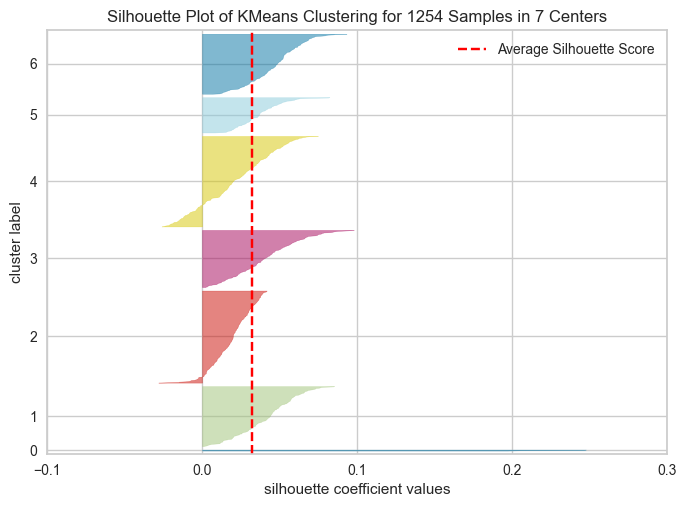

Silhoutte Score = 0.032
TF_IDF 1_gram


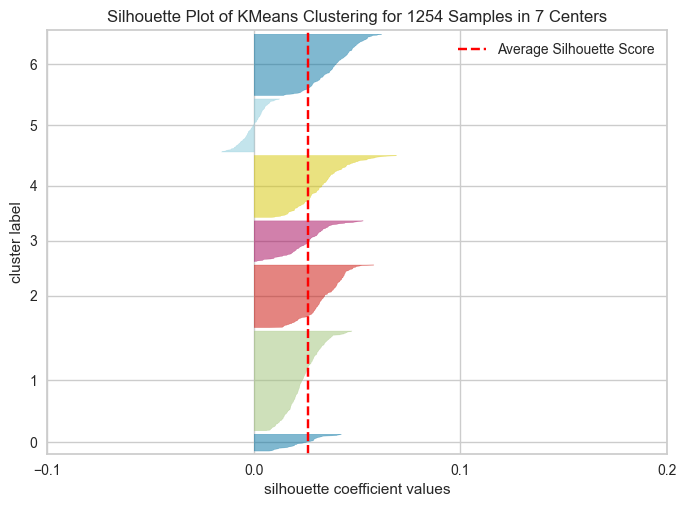

Silhoutte Score = 0.026
Doc2vec


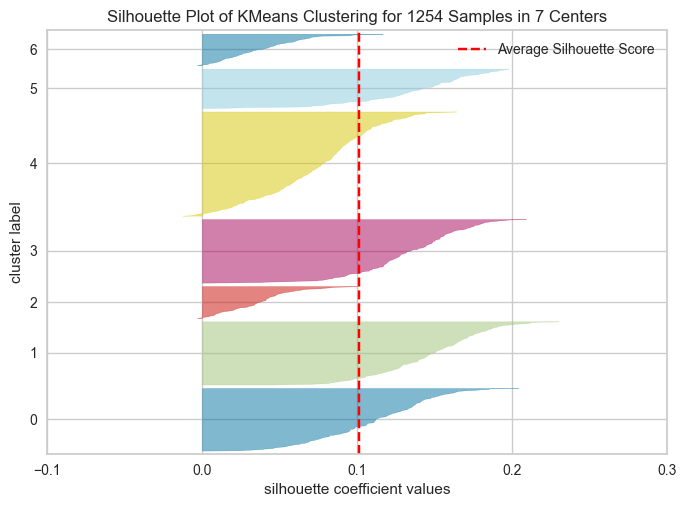

Silhoutte Score = 0.101
LDA


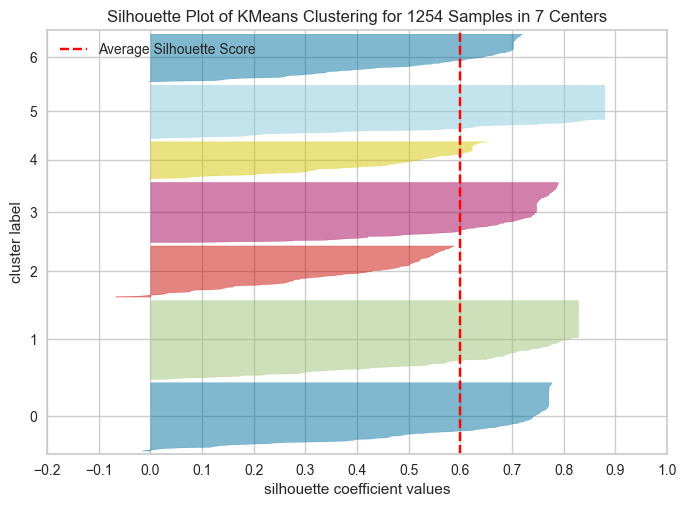

Silhoutte Score = 0.599


In [20]:
import numpy as np
from sklearn.datasets import make_blobs


for k in text_embedding.keys():

    X = text_embedding[k]
    print(k)

    # Train a Kmeans instance
    kmeans = KMeans(n_clusters=7, random_state=42).fit(X)

    # Instantiate the clustering model and visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()

    # Compute silhouette score
    silhouette = silhouette_score(X, kmeans.labels_) 
    print("Silhoutte Score = {:.3f}".format(silhouette))

In [21]:
for k in text_embedding.keys():
   print(k)
   value = optimal_clusters[k][0]
   k_value = optimal_clusters[k][1]
   print( "The best silhouette score was", value, "with k =", k_value)

BOW
The best silhouette score was 0.03960085621143899 with k = 8
TF_IDF 1_gram
The best silhouette score was 0.030030927185080453 with k = 7
Doc2vec
The best silhouette score was 0.12526242 with k = 7
LDA
The best silhouette score was 0.5989482879124137 with k = 7


#### Champion Model using Silhouette Score: LDA 

#### Distortion Score

#### Distortion is the average of the euclidean squared distance from the centroid of the respective clusters.

BOW


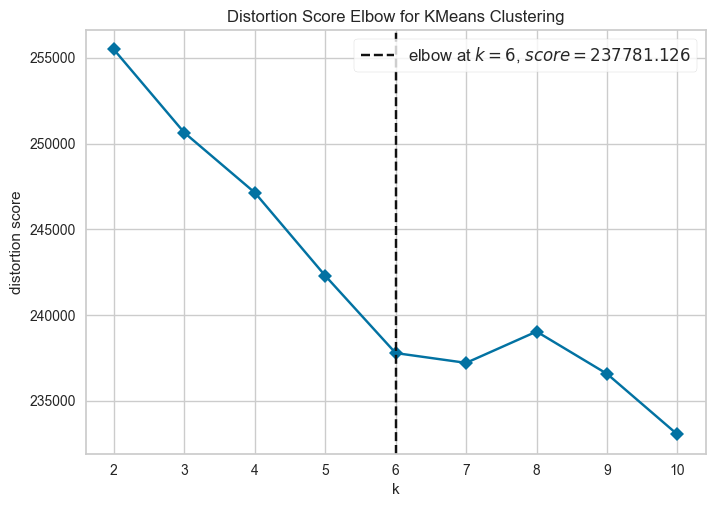

TF_IDF 1_gram


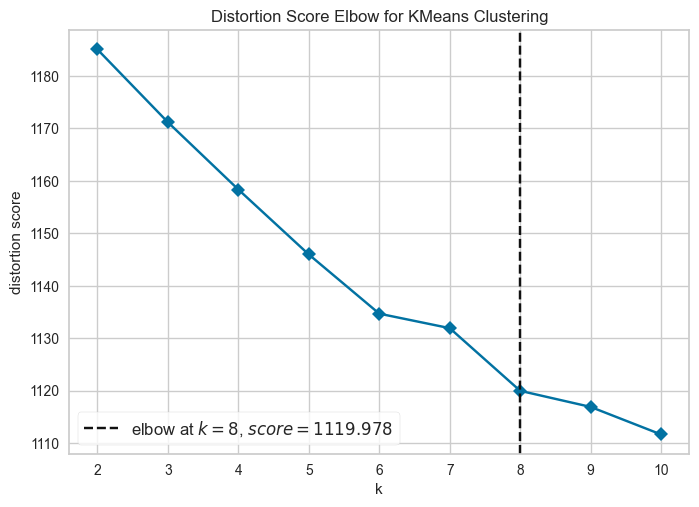

Doc2vec


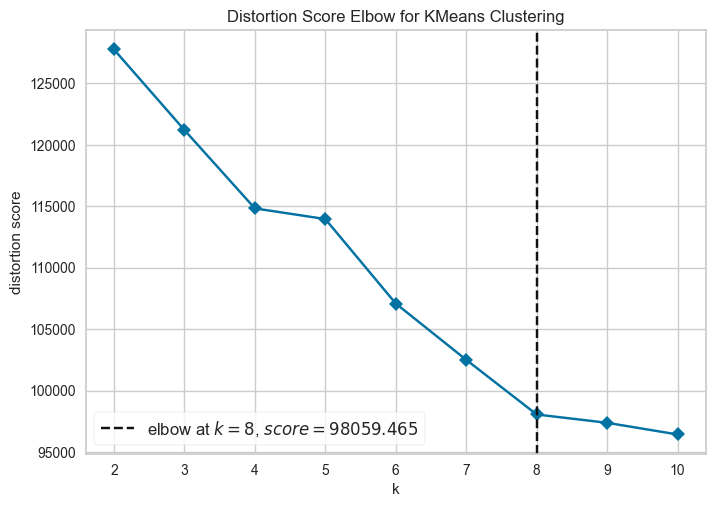

LDA


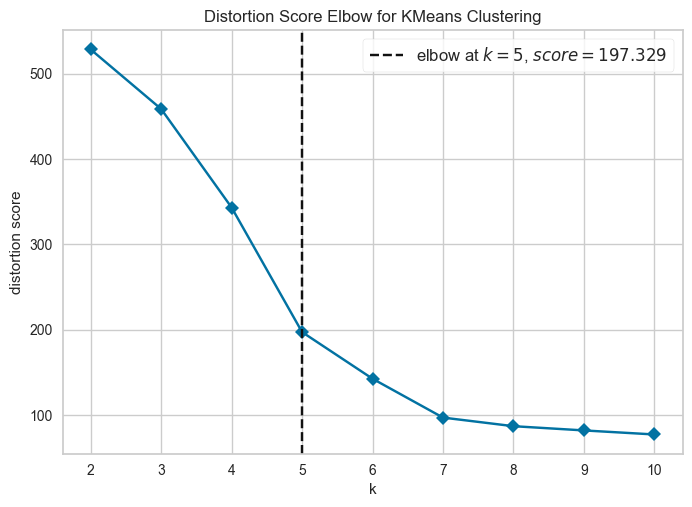

In [23]:
from yellowbrick.cluster.elbow import kelbow_visualizer


for k in text_embedding.keys():
  print(k)
  x_kmeans = text_embedding[k]
  model = kelbow_visualizer(KMeans(random_state=0), x_kmeans, k=(2,11),metric='distortion',timings=False)

#### Champion Model using Distortion Score: LDA

#### Kappa Score:

#### Cohen's kappa coefficient (κ, lowercase Greek kappa) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items.

In [24]:

def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    if num ==df_labels[df_labels[y_actual]==5][y_target].value_counts().idxmax():
        return 5
    if num ==df_labels[df_labels[y_actual]==6][y_target].value_counts().idxmax():
        return 6
    else :
      return num

In [25]:
vecs = list(text_embedding.keys())
vec_kappa = dict()
for vec in vecs:
  kmeans_doc2vec = KMeans(n_clusters = 7
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = 42
                               , algorithm = 'elkan')
  kmeans_doc2vec.fit(text_embedding[vec])
  y_pridect = kmeans_doc2vec.predict(text_embedding[vec]) 
  y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
  y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
  kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
  vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.9123457744886911,
 'TF_IDF 1_gram': 0.9794114179016482,
 'Doc2vec': 0.994384932154995,
 'LDA': 0.7799677770235457}

In [26]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Kappa Score: Doc2vec

#### Coherence

#### This indicates how closely related the documents are to each other. A higher coherence score (closer to 1.0) indicates that the cluster is a very highly related group of documents. A low coherence score (closer to 0.0) indicates that the documents are more loosely related to each other.

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
vec_coherence = dict()

# Define a function to calculate coherence
def calculate_coherence_doc2vec(doc_embeddings, kmeans_model):
    labels = kmeans_model.fit_predict(doc_embeddings)
    cluster_centers = kmeans_model.cluster_centers_
    coherence_scores = []

    for i, cluster_center in enumerate(cluster_centers):
        cluster_indices = (kmeans_model.labels_ == i)
        cluster_data = doc_embeddings[cluster_indices]
        coherence = cosine_similarity(cluster_data, [cluster_center]).mean()
        coherence_scores.append(coherence)

    average_coherence = sum(coherence_scores) / len(coherence_scores)
    return average_coherence

doc_embeddings = text_embedding['BOW']
kmeans_model = KMeans(n_clusters=7, random_state=42)


for k in text_embedding.keys():
    doc_embeddings = text_embedding[k]
    kmeans_model = KMeans(n_clusters=7, random_state=42)
    print(k)

    coherence_doc2vec = calculate_coherence_doc2vec(doc_embeddings, kmeans_model)
    vec_coherence[k] = coherence_doc2vec


    print("Coherence:", coherence_doc2vec)

BOW
Coherence: 0.47698041967301735
TF_IDF 1_gram
Coherence: 0.3104398483757742
Doc2vec
Coherence: 0.7069205471447536
LDA
Coherence: 0.9381662216473275


In [28]:
fig = go.Figure()
obj = go.Bar(x = list(vec_coherence.keys()), y = list(vec_coherence.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Coherence for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Coherence: LDA

#### After evalutaing on different evaluation parameters, our final champion Model is:
## **LDA**

#### Plotting Champion model Clusters

LDA


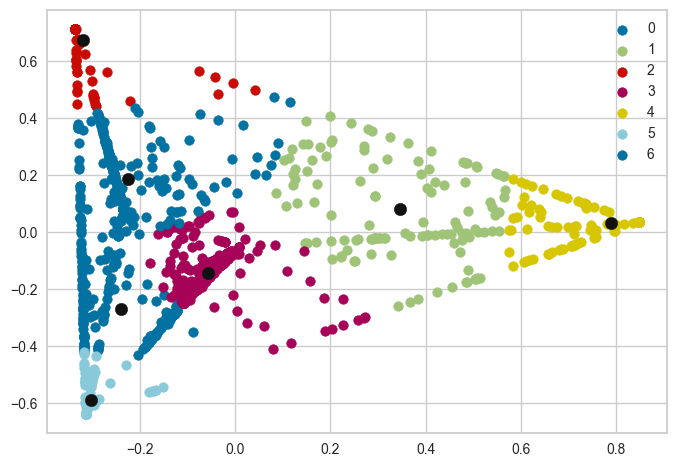

In [30]:
x_data = text_embedding['LDA']
pca = PCA(2)
x_kmeans = pca.fit_transform(x_data)
print('LDA')

    
# Apply KMeans with optimal number of clusters
kmeans_classifier = KMeans(n_clusters=7, random_state=42)
labels = kmeans_classifier.fit_predict(x_kmeans)
centroids = kmeans_classifier.cluster_centers_

u_labels = np.unique(labels)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(x_kmeans[labels == i , 0] , x_kmeans[labels == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()
    
  

#### 2. Expectation Maximization (EM)

In [31]:
import seaborn as sns
sns.set()

In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1000,)
text_embedding_pca=text_embedding.copy()
text_embedding_pca['BOW']=pca.fit_transform(text_embedding['BOW'])
text_embedding_pca['TF_IDF 1_gram']=pca.fit_transform(text_embedding['TF_IDF 1_gram'])

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,cohen_kappa_score

n_clusters = np.arange(2,10)

silhouette_for_each_transformation=text_embedding_pca.copy()
for key in silhouette_for_each_transformation.keys():
    silhouette_for_each_transformation[key]=[]

bic_for_each_transformation=text_embedding_pca.copy()
for key in bic_for_each_transformation.keys():
    bic_for_each_transformation[key]=[]


labels_for_each_transformation=text_embedding_pca.copy()
for key in labels_for_each_transformation.keys():
    labels_for_each_transformation[key]=[]

kappa_for_each_transformation=text_embedding_pca.copy()

y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
for key in text_embedding_pca.keys():
    silhouette_scores=[]
    bic=[]
    aic=[]
    kappa_at_5=[]
    labels_list=[]
    for n in n_clusters :
        model=GaussianMixture(n, covariance_type='full', random_state=42)
        labels=model.fit_predict(text_embedding_pca[key])
        silhouette_scores.append(silhouette_score(text_embedding_pca[key],labels=labels))
        if n==7 :
          y_df['y_pred']=labels
          y_df['y_pred']=y_df['y_pred'].apply(lambda row: label_mapping(num=row,y_actual = 'y_actual',y_target='y_pred',df_labels=y_df ))
          y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
          right_labels_mapping=y_df['y_pred']
          kappa_at_5=cohen_kappa_score(y_actual,right_labels_mapping )
        bic.append(model.bic(text_embedding_pca[key]))
        labels_list.append(labels)
    silhouette_for_each_transformation[key].append(silhouette_scores)
    bic_for_each_transformation[key].append(bic)
    kappa_for_each_transformation[key]=kappa_at_5
    labels_for_each_transformation[key].append(labels_list)

#### Champion Model using Silhouette Score: Doc2vec

In [45]:
kappa_for_each_transformation

{'BOW': 0.7567698423861946,
 'TF_IDF 1_gram': 0.8187029385988446,
 'Doc2vec': 0.7186151308141144,
 'LDA': 0.44164437244997024}

In [44]:
fig = go.Figure()
obj = go.Bar(x = list(kappa_for_each_transformation.keys()), y = list(kappa_for_each_transformation.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

#### Champion Model using Kappa Score: TF_IDF 1_gram

#### After evalutaing on different evaluation parameters, our final champion Model is:
## **TF-IDF 1_gram**, **Doc2Vec** and **LDA**
#### Plotting Champion model Clusters

In [51]:
from sklearn.decomposition import PCA
print("TF-IDF 1_gram")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='TF_IDF 1_gram'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

TF-IDF 1_gram


In [59]:
from sklearn.decomposition import PCA
print("Doc2vec")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='Doc2vec'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

Doc2vec


In [53]:
from sklearn.decomposition import PCA
print("LDA")
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='LDA'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][6]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

LDA


#### 3. Hierarchical

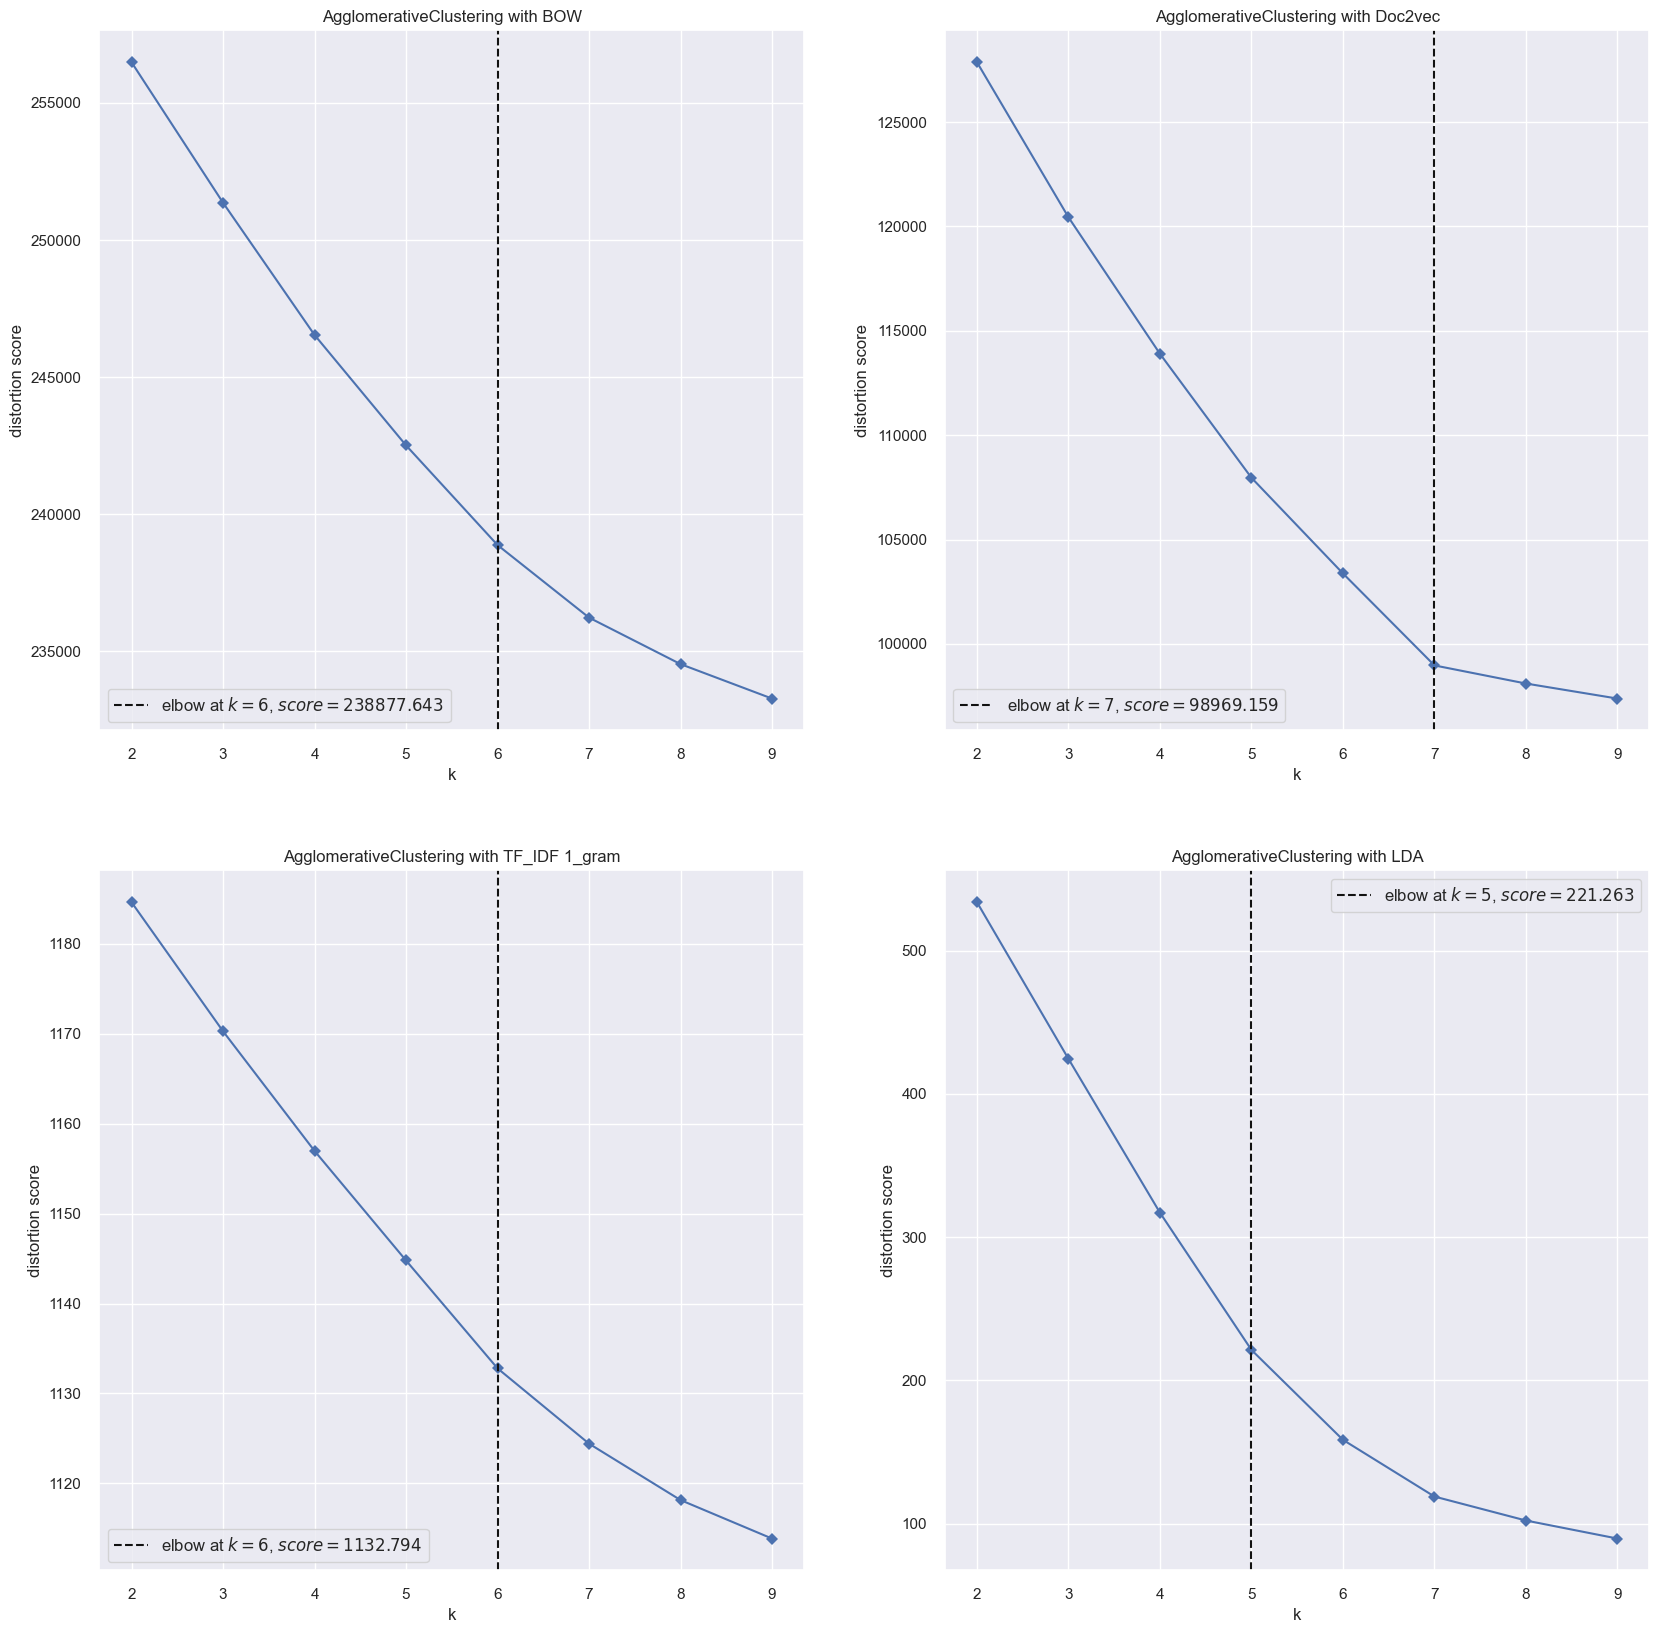

In [55]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

x_size , y_size =2,2
fig, axes = plt.subplots(2, 2,figsize=(20,20))

model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

#### Champion Model using Distortion Score: Doc2Vec

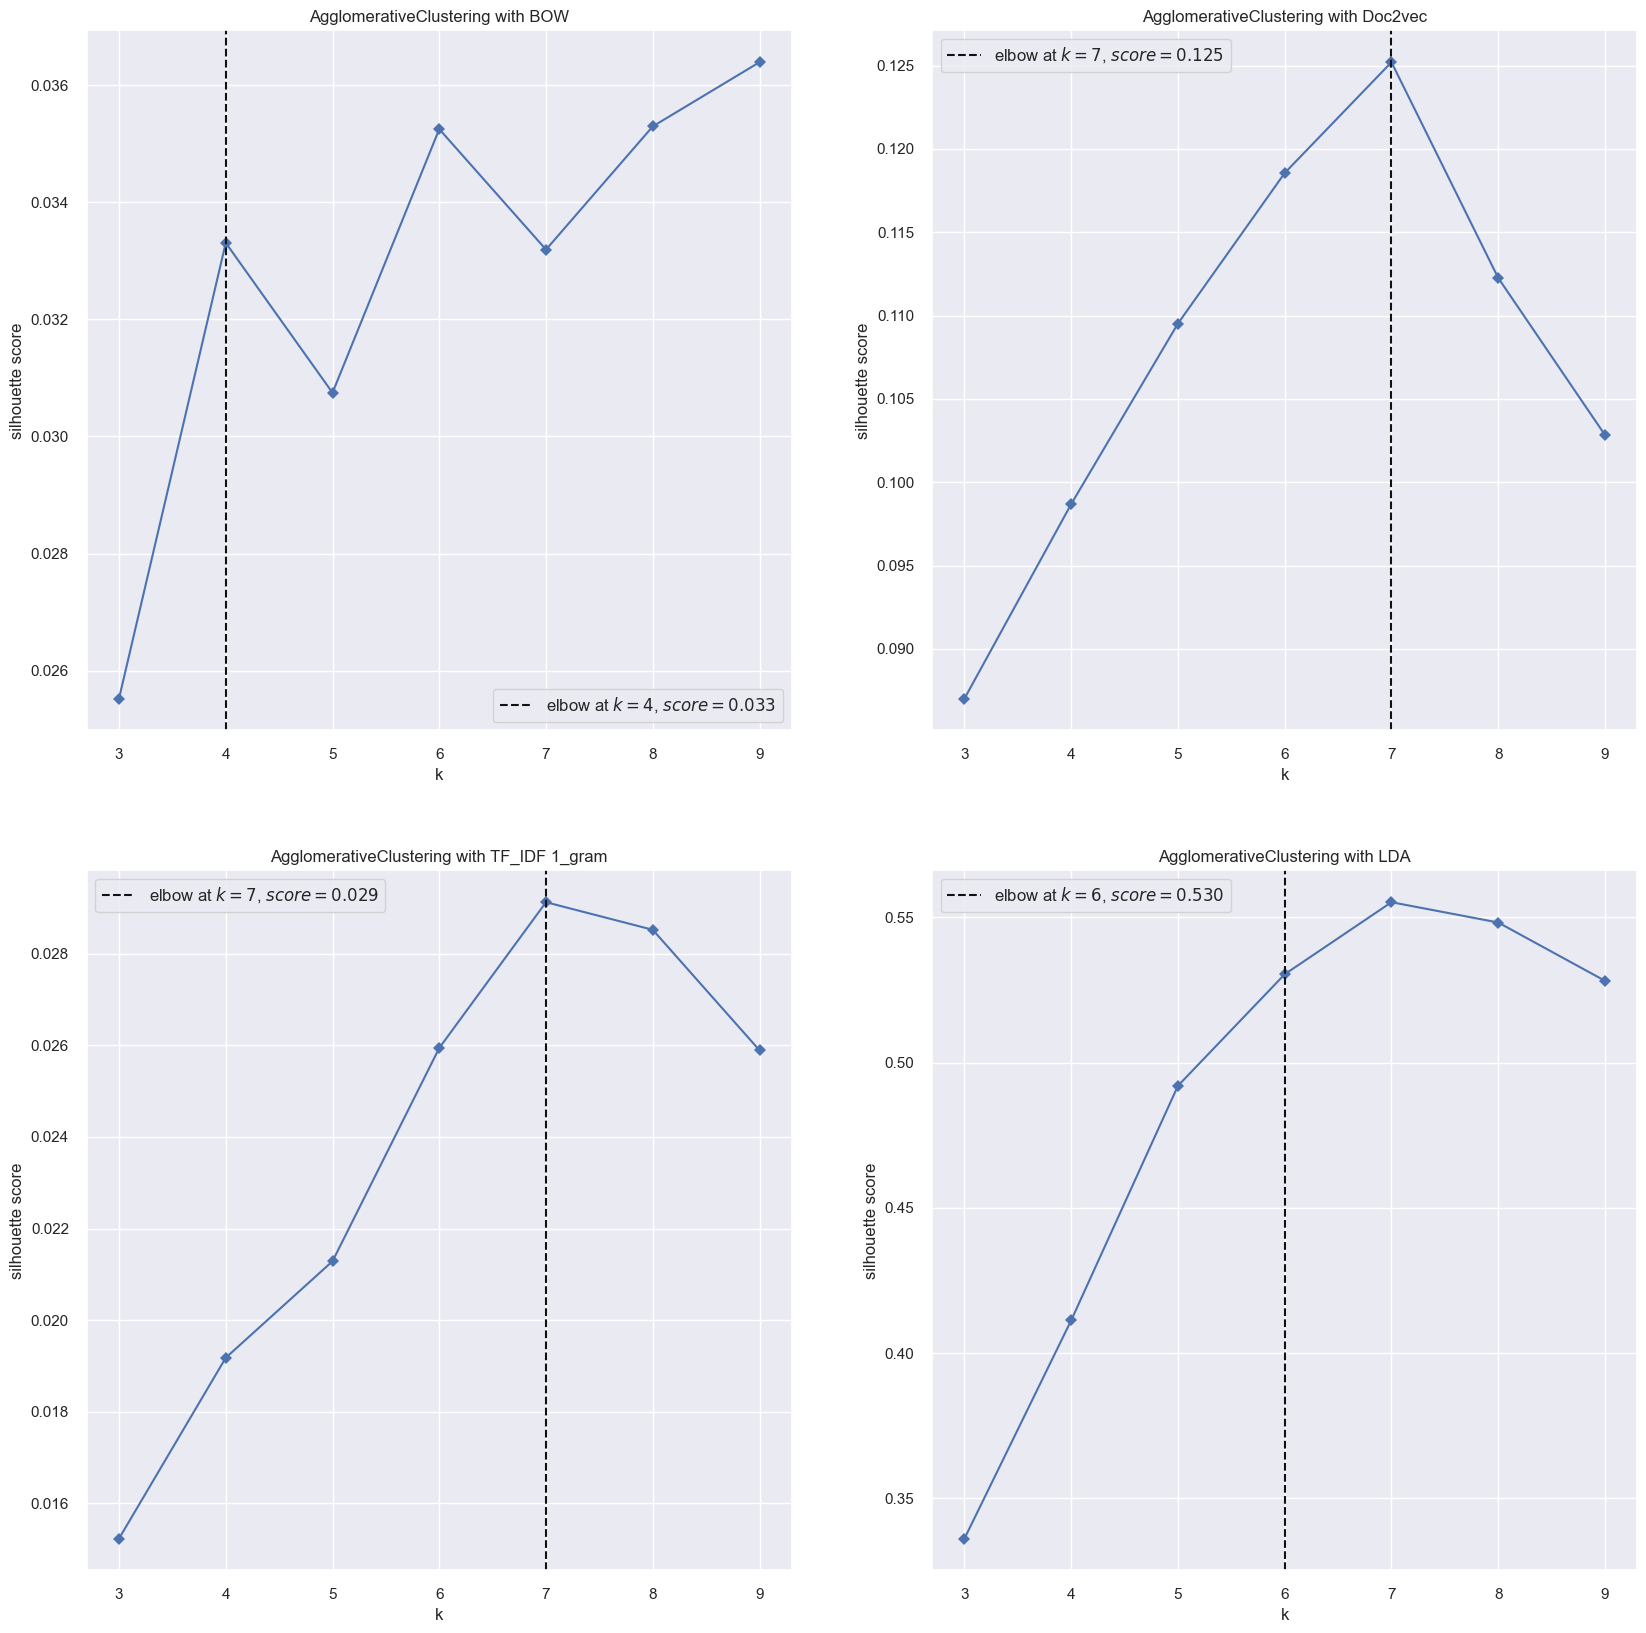

In [56]:
import matplotlib.pyplot as plt

x_size , y_size =2,2
fig, axes = plt.subplots(2, 2,figsize=(20,20))
model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

#### Champion Model using Silhouette Score: Doc2vec and TF IDF

In [60]:
from sklearn.cluster import AgglomerativeClustering
y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
models = [AgglomerativeClustering(n_clusters=7)]

models_scores = {}
for model in models:
  print(type(model).__name__)
  kappa_scores = {}
  for key in text_embedding.keys():
    clustering = model.fit(text_embedding[key])
    df_labels = pd.DataFrame({'y_actual':y_df['y_actual'], 'y_pred':clustering.labels_})
    df_labels['y_pred'] = df_labels['y_pred'].apply(lambda val: label_mapping(num=val,y_actual = 'y_actual',y_target='y_pred',df_labels=df_labels ))
    df_labels['y_pred']=df_labels['y_pred'].apply(lambda x: x-1000 if x>20 else x)
    kappa_score = cohen_kappa_score(df_labels['y_actual'], df_labels['y_pred'])
    kappa_scores[key] = kappa_score
    print(key, ':', kappa_score)
  models_scores[type(model).__name__] = kappa_scores

AgglomerativeClustering
BOW : 0.9587891589256918
TF_IDF 1_gram : 0.9616366397176509
Doc2vec : 0.9953215414289818
LDA : 0.7908834610955063


In [61]:
for model_scores,model in zip(models_scores.keys(),models):
    fig = go.Figure()
    obj = go.Bar(x = list(models_scores[model_scores].keys()), y = list(models_scores[model_scores].values()))
    fig.add_trace(obj)
    fig.update_layout(title={'text':f'Kappa Score of the {type(model).__name__}','x':0.5},height=600,width=800)
    fig.show()

#### Champion Model using Kappa Score: Doc2vec

#### After evalutaing on different evaluation parameters, our final champion Model is:
## **Doc2vec**
#### Plotting Champion model Clusters

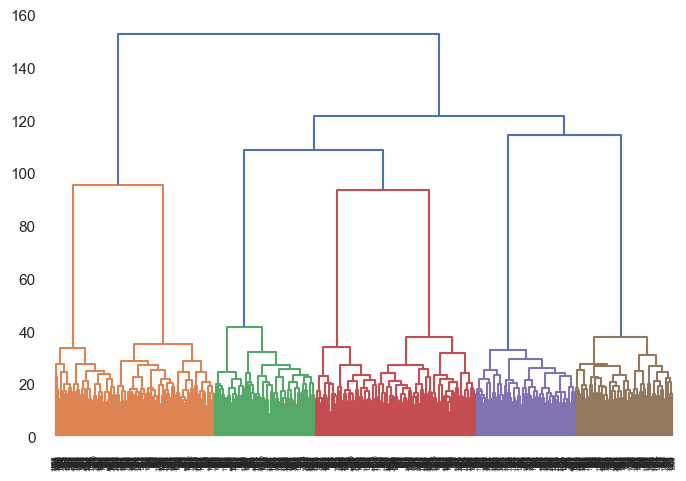

In [66]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['Doc2vec'], method='ward'))
hc = AgglomerativeClustering(n_clusters = 7, linkage = "average", metric = "cosine" )
y_hc = hc.fit_predict(text_embedding['Doc2vec'])

### Step 4: Finding the Champion Model

#### We have LDA with K-means and TF-IDF, Doc2vec and LDA with EM and Doc2vec with Hierarchical Clustering. Thus comparing the Kappa score all these models we get our champion model as 

### **Doc2Vec with Hierarchical Clustering**